In [2]:
from requests_oauthlib import OAuth1Session
import json
import datetime, time, sys
import tweepy
import csv

#Twitter APIのconsumer_key,consumer_secret,access_token,access_secretを入力
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

twitter = OAuth1Session(consumer_key, consumer_secret, access_token, access_secret)

url = 'https://api.twitter.com/1.1/search/tweets.json'
res = twitter.get(url, params = {'q':u'python', 'count':100})
res_text = json.loads(res.text)
for tweet in res_text['statuses']:
    print('-----')
    print(tweet['created_at'])
    print(tweet)

-----
Fri Apr 16 07:29:03 +0000 2021
{'created_at': 'Fri Apr 16 07:29:03 +0000 2021', 'id': 1382959204756029442, 'id_str': '1382959204756029442', 'text': 'Secure and random passphrase: afreets bleed cracking greenshank | Strength: 0.964602/1.0 | #passphrase #passwords… https://t.co/wwGesOHHcx', 'truncated': True, 'entities': {'hashtags': [{'text': 'passphrase', 'indices': [91, 102]}, {'text': 'passwords', 'indices': [103, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wwGesOHHcx', 'expanded_url': 'https://twitter.com/i/web/status/1382959204756029442', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [115, 138]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/password_gen" rel="nofollow">SecurePassphraseBot</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 336149

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

#ツイート取得
tweet_data = []

tweets = tweepy.Cursor(api.user_timeline,screen_name = "@nikkei_bizdaily",exclude_replies = True)
for tweet in tweets.items():
    tweet_data.append([tweet.id,tweet.created_at,tweet.text.replace('\n',''),tweet.favorite_count,tweet.retweet_count])
tweet_data

[[1382825232340197381,
  datetime.datetime(2021, 4, 15, 22, 36, 41),
  '【16日の紙面】黒字でも後継者に悩む中小企業は多いと言われています。そんな事業承継に新しい形が出てきているようです。編集委員がまとめました https://t.co/QaJbvoKZmU',
  11,
  8],
 [1382487216425893889,
  datetime.datetime(2021, 4, 15, 0, 13, 32),
  '【１５日の紙面】日経産業新聞で長期展開しているソニーの連載企画です。今回はゲームに焦点をあてています https://t.co/smIV8GlmKq',
  23,
  13],
 [1382103117798330371,
  datetime.datetime(2021, 4, 13, 22, 47, 16),
  '【14日の紙面】新型コロナはあらゆる産業の形態を変えました。スタートアップにももちろん影響が出ています。コロナ流行から一年、どう変わっているかまとめました https://t.co/53Xr6nYDP1',
  22,
  6],
 [1381737743328235520,
  datetime.datetime(2021, 4, 12, 22, 35, 24),
  '【13日の紙面】プロ野球団のオーナー企業でもあるDeNAを連載で取り上げました。ゲームで業績を伸ばし、これからは街づくりに活路を見出します。3ページ目では松山選手の快挙の反響もまとめています https://t.co/t0gjG3CK5u',
  6,
  3],
 [1380293859813388292,
  datetime.datetime(2021, 4, 8, 22, 57, 55),
  '【9日の紙面】VRやARは臨場感高まりますが、そこに触覚が加わるそうです。シューティングゲームなどよりリアルに体感できる、そんな最先端をまとめました https://t.co/l0huEhEBTL',
  37,
  13],
 [1379952773249163265,
  datetime.datetime(2021, 4, 8, 0, 22, 34),
  'RT @nikkei_

In [4]:
with open('./tweets.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["id", "text", "created_at", "fav", "RT"])
    writer.writerows(tweet_data)

In [5]:
import MeCab
import re
# MeCabインスタンスの作成
m = MeCab.Tagger('')

# テキストを形態素解析し辞書のリストを返す関数
def get_diclist(text):
    parsed = m.parse(text)      # 形態素解析結果
    lines = parsed.split('\n')  # 解析結果を1行（1語）ごとに分けてリスト化
    lines = lines[0:-2]         # 後ろ2行を削除
    diclist = []
    for word in lines:
        l = re.split('\t|,',word) 
        d = {'Surface':l[0], 'POS1':l[1], 'POS2':l[2]}
        diclist.append(d)
    return(diclist)

In [7]:
#データセットのダウンロード
import urllib.request
import zipfile
# URLを指定
url = "https://storage.googleapis.com/tutor-contents-dataset/6050_stock_price_prediction_data.zip"
save_name = url.split('/')[-1]
# ダウンロード
mem = urllib.request.urlopen(url).read()
# ファイルへ保存
with open(save_name, mode='wb') as f:
    f.write(mem)
# zipファイルをカレントディレクトリに展開
zfile = zipfile.ZipFile(save_name)
zfile.extractall('.')

In [8]:
import pandas as pd
pn_df = pd.read_csv('./6050_stock_price_prediction_data/pn_ja.csv', encoding='utf-8', names=('Word','Reading','POS', 'PN'))
#word_listにリスト型でWordを格納
word_list = list(pn_df['Word'])
#pn_listにリスト型でPNを格納
pn_list   = list(pn_df['PN'])
#pn_dictとしてword_list, pn_listを格納した辞書を作成
pn_dict   = dict(zip(word_list, pn_list))
print(list(pn_dict.keys())[:10])
print(len(pn_dict.keys()))

['優れる', '良い', '喜ぶ', '褒める', 'めでたい', '賢い', '善い', '適す', '天晴', '祝う']
52671


In [9]:
import numpy as np
# 形態素解析結果の単語ごとのdictデータにPN値を追加する関数
def add_pnvalue(diclist_old, pn_dict):
    diclist_new = []
    for word in diclist_old:
        base = word['Surface']        # 個々の辞書から基本形を取得
        if base in pn_dict:
            pn = float(pn_dict[base]) 
        else:
            pn = 'notfound'         
        word['PN'] = pn
        diclist_new.append(word)
    return(diclist_new)
# 各ツイートのPN平均値を求める
def get_mean(dictlist):
    pn_list = []
    for word in dictlist:
        pn = word['PN']
        if pn!='notfound':
            pn_list.append(pn)
    if len(pn_list)>0:
        pnmean = np.mean(pn_list)
    else:
        pnmean=0
    return pnmean

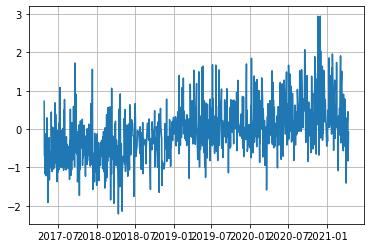

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df_tweets = pd.read_csv('./tweets.csv', names=['id', 'date', 'text', 'fav', 'RT'], index_col='date')
df_tweets = df_tweets.drop('text', axis=0)
df_tweets.index = pd.to_datetime(df_tweets.index)
df_tweets = df_tweets[['text']].sort_index(ascending=True)

# ツイートごとの平均値を求める
means_list = []
for tweet in df_tweets['text']:
    dl_old = get_diclist(tweet)
    dl_new = add_pnvalue(dl_old, pn_dict)
    pnmean = get_mean(dl_new)
    means_list.append(pnmean)

# means_listをnumpy配列に変換
means_list = np.copy(means_list)

# means_listを用いて標準化
x_std = (means_list - means_list.mean()) / means_list.std()

df_tweets['pn'] = x_std
df_tweets = df_tweets.drop('text', axis=1)
df_tweets.index = pd.to_datetime(df_tweets.index)
# 1日ごとにpn値を平均でまとめて、欠損値は線形補間を行う
df_tweets =  df_tweets.resample('D').mean().interpolate()

# 日付をx軸PN値をy軸にしてプロット
x = df_tweets.index
y = df_tweets.pn
plt.plot(x,y)
plt.grid(True)

# df_tweets.csvという名前でdf_tweetsを再び出力
df_tweets.to_csv('./df_tweets.csv')